# Artificial Neural Networks AM41AN

## Week 2 Binary Perceptron

## Task 1 a

Construct your own artificial dataset. The dataset is compossed by two Normally distributed clusters with 100 elements each, one centered at
$\boldsymbol{\mu}_{-}$ and covariance matrix $\boldsymbol{\Sigma}_-$, given the label $t=-1$ and other centered at
$\boldsymbol{\mu}_+$ with covariance matrix $\boldsymbol{\Sigma}_+$, given the label  $t=1$.

## Task 1 b
Mak a 3d plot of your data set.



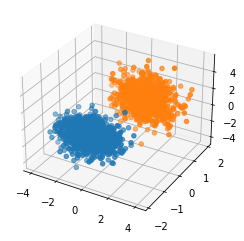

In [1]:
################
### Task 1 a ###
################

import numpy as np                        # Imports NumPy
def data(mx,my,mz,sx,sy,sz,N):            # Function data(mx,my,mz,sx,sy,sz) constructs N Gaussian deviates centered at (mx,my,mz) with 
                                          # std (sx,sy,sz)
    ex = np.random.normal(0, sx, N)       # Noise array in x
    ey = np.random.normal(0, sy, N)       # Noise array in y
    ez = np.random.normal(0, sz, N)       # Noise array in z
    x  = mx + ex                          # Array of the first coordinate
    y  = my + ey                          # Array of the second coordinate
    z  = mz + ez                          # Array of the third coordinate
    return(x,y,z)                         # The function returns two arrays of dim N.

x0 , y0 , z0 = data(-1,-1,-1,1,.3,1,1000)    # First cluster
x1 , y1 , z1 = data(1,1,1,1,.3,1.22,1000) # Second cluster

################
### Task 1 b ###
################

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt          # Imports PyPlot          
ax = plt.axes(projection='3d')
ax.scatter3D(x0,y0,z0)                   # Simplest possible scatter points plot 
ax.scatter3D(x1,y1,z1)                   # Simplest possible scatter points plot 
plt.show()


## Task 2 a
Implement the perceptron learning algorithm:
$$
|\boldsymbol{w}_{n+1}\rangle|=\boldsymbol{w}_{n}\rangle+\eta\Theta(-t_n\langle\boldsymbol{w}_n|\boldsymbol{x}_n\rangle)t_n|\boldsymbol{x}_n\rangle
$$
for a suitable value of the stepsize $\eta$.

## Task 2 b

Count the number of steps until convergence.

In [2]:
###################
### Task 2 a, b ###
###################

import random as rnd

def perc(r0,s0,t0,r1,s1,t1,Max,eta):                 # Function perc(vec0,vec1,Max,eta) vec0=(r0,s0,t0), vec1=(r1,s1,t1), Max is the
                                                     # maximum number of iterations and eta is the step
        wx  = 0                                      # Counters set to zero
        wy  = 0
        wz  = 0
        ll  = len(r0) - 1                            # Length of the data set -1 (for the random number generator)
        tau = np.zeros(ll + 1)                       # The k-th entry of this vector counts how many times the k-th input has been missclassified 
        for i in range(Max):
            k  = rnd.randint(0,ll)                   # Index of the input to be used
            c  = rnd.randint(0,1)                    # Subset to be used
            if c == 0:                               # Proposed change
                x = -1 * r0[k]
                y = -1 * s0[k]
                z = -1 * t0[k]
            else:
                x = r1[k]
                y = s1[k]
                z = t1[k]
            ip = wx * x + wy * y + wz * z            
            if ip <= 0:                              # If the sign of the inner product time the classification is negative the change
                wx     = wx     + eta * x            # is implemented
                wy     = wy     + eta * y
                wz     = wz     + eta * z
                tau[k] = tau[k] + 1                  # Counting the misclassification
        error = 0
        for i in range(ll + 1):                      # Computation of the error
            ip = -1 * (wx * r0[i] + wy * s0[i] + wz * t0[i])
            if ip < 0:
                error = error + 1
            ip = wx * r1[i] + wy * s1[i] + wz * t1[i]
            if ip < 0:
                error = error + 1
        error = error / (2 * (ll + 1))
        zz = np.sqrt(wx * wx + wy * wy + wz * wz)    # Normalization of the vector w
        wx = wx / zz
        wy = wy / zz
        wz = wz / zz
        return(error,sum(tau),wx,wy,wz)
        
perc(x0,y0,z0,x1,y1,z1,1000,1)


(0.001, 4.0, 0.20701713356988918, 0.9769064739050739, -0.05289279394078017)

## Task 3
Compute the average error, number of updates and parameters, with their standard deviations. To do so run the algorithm perc 1000 times (separated in 10 groups of 100 runs each). 

In [3]:
##############                               # The theory behind this program is delivered in AM41ML Statistical Machine Learning
### Task 3 ###
##############
def stat(r0,s0,t0,r1,s1,t1,Max,eta,N1,N2):   # Function stat(.). Computes the statistics of the outputs of perc 
    ee1 = 0
    ee2 = 0
    tt1 = 0
    tt2 = 0
    wx1 = 0
    wx2 = 0
    wy1 = 0
    wy2 = 0
    wz1 = 0
    wz2 = 0
    for i1 in range(N1):
        Ee1 = 0
        Ee2 = 0
        Tt1 = 0
        Tt2 = 0
        Wx1 = 0
        Wx2 = 0
        Wy1 = 0
        Wy2 = 0
        Wz1 = 0
        Wz2 = 0
        for i2 in range(N2):                                           # Calculation of the first and second moment per experiment
            ee , tt , xx , yy , zz = perc(r0,s0,t0,r1,s1,t1,Max,eta)
            Ee1 = Ee1 + ee
            Ee2 = Ee2 + ee * ee
            Tt1 = Tt1 + tt
            Tt2 = Tt2 + tt * tt
            Wx1 = Wx1 + xx
            Wx2 = Wx2 + xx * xx
            Wy1 = Wy1 + yy
            Wy2 = Wy2 + yy * yy
            Wz1 = Wz1 + zz
            Wz2 = Wz2 + zz * zz
        Ee1 = Ee1 + ee / N2                                            # Experimental means and variances per experiment
        Ee2 = np.abs(Ee2 / N2 - Ee1 ** 2)
        Tt1 = Tt1 / N2 
        Tt2 = np.abs(Tt2 / N2 - Tt1 ** 2)
        Wx1 = Wx1 / N2 
        Wx2 = np.abs(Wx2 / N2 - Wx1 ** 2)
        Wy1 = Wy1 / N2 
        Wy2 = np.abs(Wy2 / N2 - Wy1 ** 2)
        Wz1 = Wz1 / N2 
        Wz2 = np.abs(Wz2 / N2 - Wz1 ** 2)
        ee1 = ee1 + Ee1                                                # Accumulation of first and second cummulants accross experiments
        ee2 = ee2 + Ee2
        tt1 = tt1 + Tt1
        tt2 = tt2 + Tt2
        wx1 = wx1 + Wx1
        wx2 = wx2 + Wx2
        wy1 = wy1 + Wy1
        wy2 = wy2 + Wy2
        wz1 = wz1 + Wz1
        wz2 = wz2 + Wz2
    ee1 = ee1 / N1                                                     # Means and standard deviations over experiments
    ee2 = np.sqrt(ee2 / (N1 * (N1 - 1)))                               
    tt1 = tt1 / N1
    tt2 = np.sqrt(tt2 / (N1 * (N1 - 1)))
    wx1 = wx1 / N1
    wx2 = np.sqrt(wx2 / (N1 * (N1 - 1)))
    wy1 = wy1 / N1
    wy2 = np.sqrt(wy2 / (N1 * (N1 - 1)))
    wz1 = wz1 / N1
    wz2 = np.sqrt(wz2 / (N1 * (N1 - 1)))
    print(ee1,'+-',ee2)
    print(tt1,'+-',tt2)
    print(wx1,'+-',wx2)
    print(wy1,'+-',wy2)
    print(wz1,'+-',wz2)
    
stat(x0,y0,z0,x1,y1,z1,5000,1,10,100)
        
        
            
       


0.021751500000000007 +- 0.007618984056654508
8.575999999999999 +- 1.1433197278102045
0.11421862646033416 +- 0.028471510923387316
0.9835828754527643 +- 0.005067355524617547
0.07707461198631374 +- 0.025664385518479285
